# BIFOLD Aqtivate workshop - Kernel methods

## Imports and linear regression model

In [1]:
import pylab as pl
import scipy as sp
from numpy.linalg import inv
from numpy.linalg import solve
from scipy.io import loadmat
import numpy as np
from scipy.spatial.distance import cdist
%matplotlib inline

In [98]:
def train_ols(X_train, Y_train):
    ''' Trains ordinary least squares (ols) regression 
    Input:       X_train  -  DxN array of N data points with D features
                 Y        -  D2xN array of length N with D2 multiple labels
    Output:      W        -  DxD2 array, linear mapping used to estimate labels 
                             with np.dot(W.T, X)                      
    '''
    W = solve(X_train @ X_train.T, X_train @Y_train.T)
    return W
    
def apply_ols(W, X_test):
    ''' Applys ordinary least squares (ols) regression 
    Input:       X_test    -  DxN array of N data points with D features
                 W        -  DxD2 array, linear mapping used to estimate labels 
                             trained with train_ols                   
    Output:     Y_test    -  D2xN array
    '''
    Y_test = W.T @ X_test
    return Y_test

def test_sine_toydata(kwidth = 1, llambda = 1):
    #Data generation
    X_train = np.arange(0,10,.01)
    X_train = X_train[None,:]
    X_test = np.linspace(0, 10, 500)
    X_test = X_test[None, :]
    Y_train = np.sin(X_train) + np.random.normal(0, .5, X_train.shape)
    # Linear Regression 
    w_est = train_ols(X_train, Y_train) 
    Y_est_lin = apply_ols(w_est, X_test)
    
    # Kernel Ridge Regression
    alphas = train_krr(X_train, Y_train, kwidth, llambda)
    Y_est_krr = apply_krr(alphas, X_train, X_test, kwidth)
    
    #Plot result
    pl.figure()
    pl.plot(X_train.T, Y_train.T, '+k', label = 'Train Data')
    pl.plot(X_test.T, Y_est_lin.T, '-.', linewidth = 2, label = 'OLS')
    pl.plot(X_test.T, Y_est_krr.T,  'r', linewidth = 2, label = 'KRR')
    pl.xlabel('x')
    pl.ylabel('y')
    pl.title(r'$\lambda$ = ' + str(llambda) + '   $\sigma$ = ' + str(kwidth))
    pl.legend(loc = 'lower right')


def test_gaussian_kernel():
    #Data generation
    X1 = np.linspace(0, 10, 10)
    X1 = X1[None,:]
    X2 = np.linspace(0, 10, 20)
    X2 = X2[None,:]
    K = GaussianKernel(X1, X2, kwidth=1.)
    assert K.shape == (10, 20), f'Shape is wrong. {K.shape} != (10, 20)'

## Coding exercise

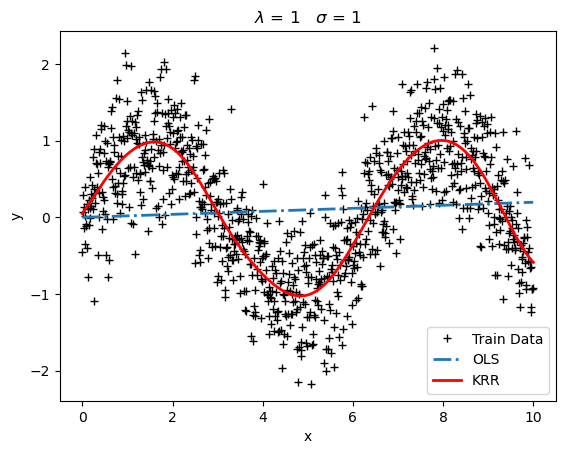

In [129]:

def GaussianKernel(X1, X2, kwidth):
    ''' Compute Gaussian Kernel 
    Input: X1    - DxN1 array of N1 data points with D features 
           X2    - DxN2 array of N2 data points with D features 
           kwidth - Kernel width
    Output K     - N1 x N2 Kernel matrix
    '''
    assert(X1.shape[0] == X2.shape[0])
    # YOUR CODE HERE
    # using scipy
    K = cdist(X1.T, X2.T, 'euclidean')
    K = np.exp(-(K ** 2) / (2. * kwidth ** 2))

    # manual version
    # temp = X1[:, None] - X2[..., None]
    # distance = np.linalg.norm(temp, axis=0).T
    # K = np.exp(-distance / (2 * kwidth**2))
    return K

def train_krr(X_train, Y_train, kwidth, llambda):
    ''' Trains kernel ridge regression (krr)
    Input:       X_train  -  DxN array of N data points with D features
                 Y        -  D2xN array of length N with D2 multiple labels
                 kwdith   -  kernel width
                 llambda    -  regularization parameter
    Output:      alphas   -  NxD2 array, weighting of training data used for apply_krr                     
    '''
    # YOUR CODE HERE
    K = GaussianKernel(X_train, X_train, kwidth)
    alphas = inv(K + np.eye(len(K))) @ Y_train.T
    return alphas


def apply_krr(alphas, X_train, X_test, kwidth):
    ''' Applys kernel ridge regression (krr)
    Input:      alphas      -  NtrxD2 array trained in train_krr      
                X_train     -  DxNtr array of Ntr train data points with D features
                X_test      -  DxNte array of Nte test data points with D features
                kwidht      -  Kernel width             
    Output:     Y_test      -  D2xNte array
    '''
    # YOUR CODE HERE
    k = GaussianKernel(X_train, X_test, kwidth)
    Y_test = (k.T @ alphas).T
    return Y_test

test_gaussian_kernel()
test_sine_toydata()

**Implement Kernel Ridge Regression (KRR)** by completing the function stubs  ```krr_train``` and  ```krr_apply```. 
Remember the notation, 
$$X_{\text{train}} \in \mathbb{R}^{D_X \times N_{tr}}, \;  Y_{\text{train}} \in \mathbb{R}^{D_Y \times N_{tr}}, \; X_{\text{test}} \in \mathbb{R}^{D_X \times N_{te}}$$
In ```krr_train```, you estimate a linear combination of the input vectors $\alpha$, 
$$\alpha = (K + \lambda I)^{-1}Y_{\text{train}}^T$$
where $\lambda$ is the regularization parameter and $K$ is the $N_{tr} \times N_{tr}$ Gaussian Kernel matrix with Kernel width $\sigma$, $K_{ij} =  \exp\left( - \frac{\| X_{\text{train}}^i - X_{\text{train}}^j\|^2}{\sigma^2} \right)$. You can compute $K$ with the provided function ```GaussianKernel```.

The function ```krr_apply``` than uses the weights $\alpha$ to predict (unknown) new test data $X_{\text{test}}$
$$Y_{\text{test}} = (\mathbf{k} \alpha)^T.$$
where $\mathbf k$ is the $N_{\text{test}} \times N_{\text{train}}$ matrix $\mathbf{k}_{ij} =   \exp\left( - \frac{\| X_{\text{test}}^i - X_{\text{train}}^j\|^2}{\sigma^2}\right)$.    

We test our code on the function  ```test_sine_toydata```. It generates toy data that follows a sine function, $x_i \in \{0, 0.01, 0.02, \ldots, 10\}, y_i = \sin(x_i) + \epsilon, \epsilon \sim \mathcal{N}(0, 0.5)$. The result of KRR should resemble the sine function.

**Hyperparameter dependence** 
We want to analyse how the Kernel Ridge solution depends on its hyperparameters, the kernel width $\sigma$ and  the regularization parameter $\lambda$. 
- Call the function  ```test_sine_toydata```  with $\lambda$ = 1 for three different Kernel widths, $\sigma = \{ 0.1, 1, 10\}$.
- Call the function  ```test_sine_toydata```  with $\sigma$ = 1 for three different regularization parameters, $\lambda = \{ 10^{-10}, 1, 500\}$. 

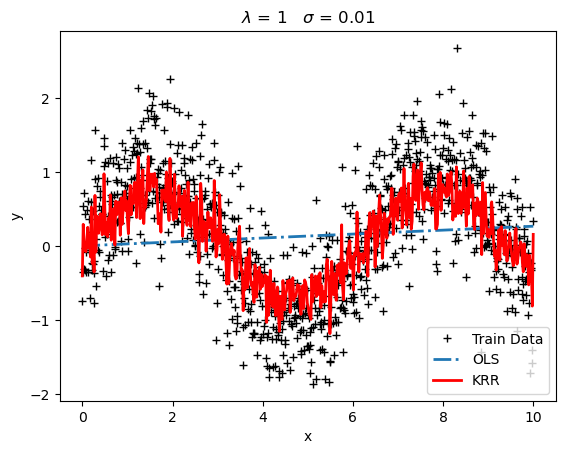

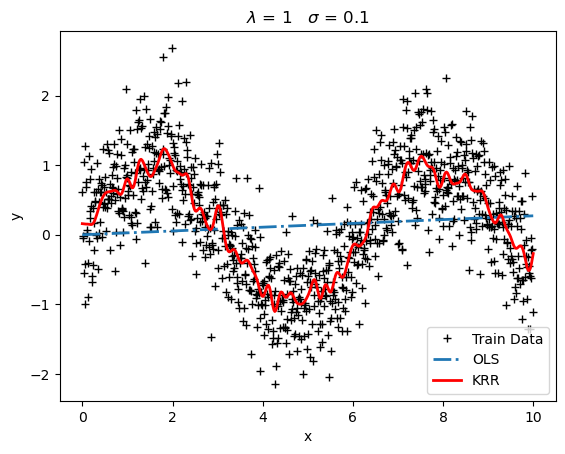

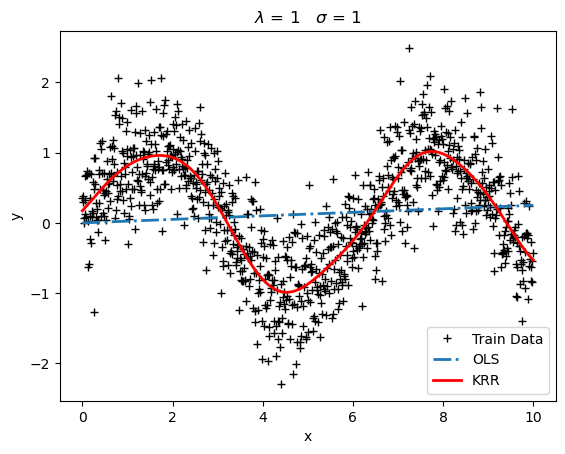

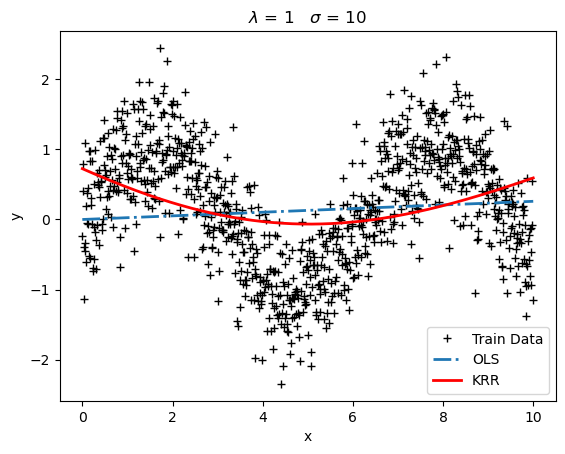

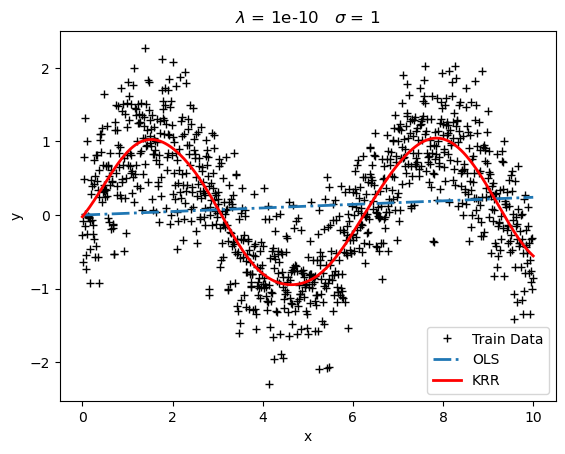

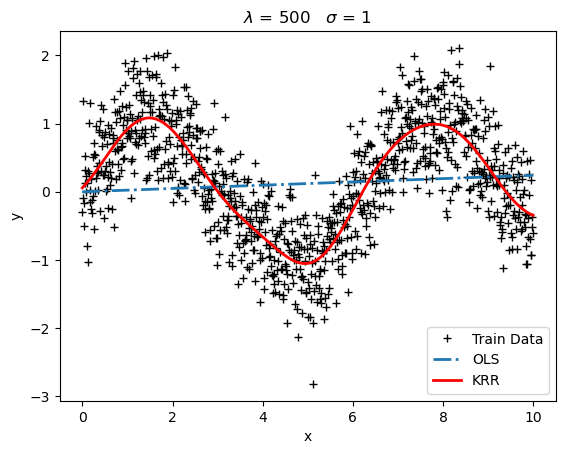

In [175]:
test_sine_toydata(kwidth = 0.01, llambda = 1)
test_sine_toydata(kwidth = 0.1, llambda = 1)
test_sine_toydata(kwidth = 1, llambda = 1)
test_sine_toydata(kwidth = 10, llambda = 1)
test_sine_toydata(kwidth = 1, llambda = 1e-10)
test_sine_toydata(kwidth = 1, llambda = 500)

## Working on a real dataset

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [171]:
diabetes = load_diabetes()
print(f'data.shape = {diabetes.data.shape}\n'
      f'target.shape = {diabetes.target.shape}')

# create train/test split
X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.33, random_state=42)
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train[None, :]
Y_test = Y_test[None, :]

data.shape = (442, 10)
target.shape = (442,)


### Tasks

(i) Train kernel ridge regression model and a linear model on this dataset and report the `mean_squared_error`.

(ii) Find the optimal value for the width $\sigma$ of the gaussian kernel.

(iii) Ananlyze the spectral properties depending $\sigma$.

In [102]:
# Linear Regression 
w_est = train_ols(X_train, Y_train) 
Y_test_lin = apply_ols(w_est, X_test)

# Kernel Ridge Regression
kwidth = 1.
llambda = 10.
alphas = train_krr(X_train, Y_train, kwidth, llambda)
Y_test_krr = apply_krr(alphas, X_train, X_test, kwidth)

(296, 146)
(296, 1)


/var/folders/cg/56zg_yd94b173fpm32wzj96r0000gn/T/ipykernel_142/3616289182.py:12: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = sp.exp(-(K ** 2) / (2. * kwidth ** 2))


In [111]:
mse_krr = mean_squared_error(Y_test_krr, Y_test)
mse_lin = mean_squared_error(Y_test_lin, Y_test)

In [112]:
print(f'mse_krr = {mse_krr}\n'
      f'mse_lin = {mse_lin}')

mse_krr = 3215.2001926189882
mse_lin = 27369.62744940528


In [148]:
llambda = 10.
kwidth_np = np.geomspace(0.01, 100., 10)
for kwidth in kwidth_np:
    alphas = train_krr(X_train, Y_train, kwidth, llambda)
    Y_test_krr = apply_krr(alphas, X_train, X_test, kwidth)
    mse_krr = mean_squared_error(Y_test_krr, Y_test)
    print(f'kwidth = {kwidth:.2f}   ', f'llambda = {llambda:.0f}        ', f'mse = {mse_krr:.0f}')

kwidth = 0.01    llambda = 10         mse = 28991
kwidth = 0.03    llambda = 10         mse = 25739
kwidth = 0.08    llambda = 10         mse = 4414
kwidth = 0.22    llambda = 10         mse = 2697
kwidth = 0.60    llambda = 10         mse = 2880
kwidth = 1.67    llambda = 10         mse = 3896
kwidth = 4.64    llambda = 10         mse = 5281
kwidth = 12.92    llambda = 10         mse = 5686
kwidth = 35.94    llambda = 10         mse = 5747
kwidth = 100.00    llambda = 10         mse = 5755


In [172]:
def plot_kernel(K):
    plt.title('Kernel matrix')
    ax = plt.imshow(K, vmin=0, vmax=1)
    plt.colorbar()

def plot_singular_values(K, label=''):
    U, s, V = np.linalg.svd(K)
    plt.plot(s, label=label)
    plt.semilogy()
    plt.title('Singular values')
    plt.ylabel('Magnitude')

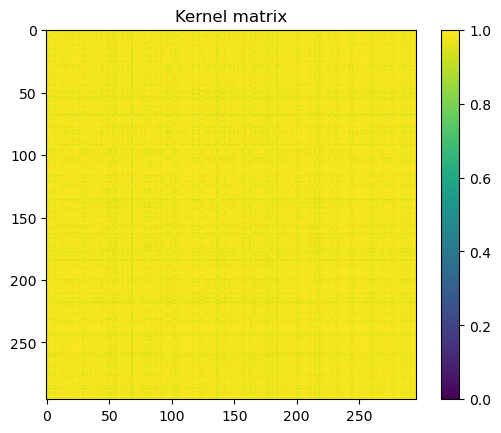

In [173]:
K = GaussianKernel(X_train, X_train, 1.)
plot_kernel(K)

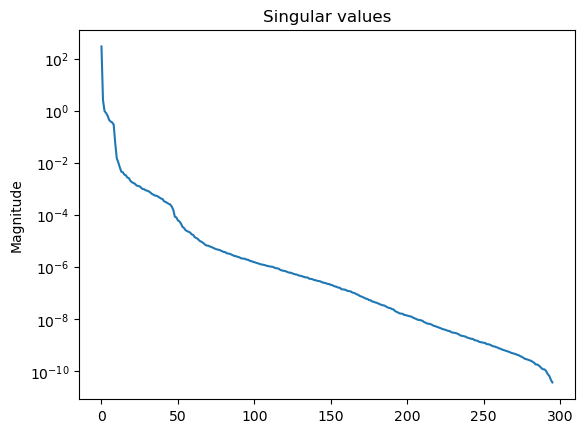

In [174]:
plot_singular_values(K)

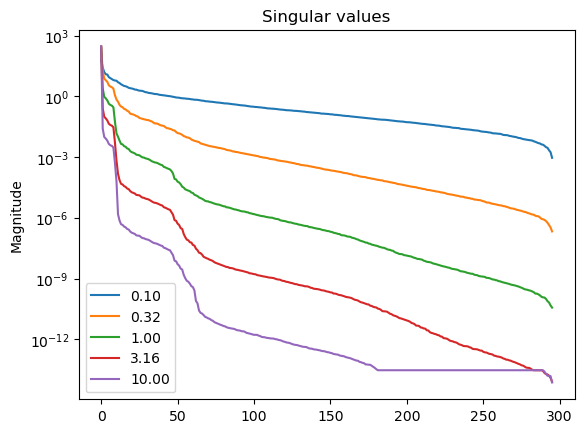

In [170]:
for kwidth in np.geomspace(0.1, 10., 5):
    K = GaussianKernel(X_train, X_train, kwidth)
    plot_singular_values(K, label=f'{kwidth:.2f}')
plt.legend()